In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import logging
import os
import warnings
from urllib.parse import urlparse
import mlflow
import mlflow.keras
from mlflow.models import infer_signature

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)
logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)
os.chdir('/home/randi_eka/Artificial_Inteligence')

2023-10-17 23:14:34.120614: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-17 23:14:34.120668: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-17 23:14:34.120695: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-17 23:14:34.126626: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 23:14:34.901297: W tensorflow/compiler/

In [2]:
data = pd.read_csv("Pertemuan_6/diabetes.csv", sep=";")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
X = data.drop("Outcome", axis=1)
print(X.head())
y = data["Outcome"]
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
# Fit and transform the data and convert it back to a DataFrame in one step
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [6]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [7]:
rand_seed=123

tf.random.set_seed(
    rand_seed
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_seed)

In [8]:
neuron = 8
hidden_layers = 2
batch_size = 10
epochs = 500
activation = 'linear'
loss = 'binary_crossentropy'
optimizer = 'adam'

In [9]:
# Define the model
model = Sequential()
model.add(Dense(neuron, input_dim=8, activation=activation))
model.add(Dense(neuron, activation=activation))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

2023-10-17 23:14:36.344233: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 23:14:36.400019: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 23:14:36.400307: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 23:14:36.402093: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-17 23:14:36.402327: I tensorflow/compile

In [10]:
# Fit the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/500


2023-10-17 23:14:38.942620: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5627ebede010 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-17 23:14:38.942656: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-10-17 23:14:38.946162: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-17 23:14:40.082094: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8902
2023-10-17 23:14:40.142207: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


62/62 [==============================] - 3s 4ms/step - loss: 0.6650 - accuracy: 0.6482
Epoch 2/500
62/62 [==============================] - 0s 3ms/step - loss: 0.6431 - accuracy: 0.6596
Epoch 3/500
62/62 [==============================] - 0s 4ms/step - loss: 0.6330 - accuracy: 0.6564
Epoch 4/500
62/62 [==============================] - 0s 3ms/step - loss: 0.6259 - accuracy: 0.6580
Epoch 5/500
62/62 [==============================] - 0s 3ms/step - loss: 0.6184 - accuracy: 0.6629
Epoch 6/500
62/62 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.6547
Epoch 7/500
62/62 [==============================] - 0s 4ms/step - loss: 0.6009 - accuracy: 0.6759
Epoch 8/500
62/62 [==============================] - 0s 3ms/step - loss: 0.5937 - accuracy: 0.6726
Epoch 9/500
62/62 [==============================] - 0s 3ms/step - loss: 0.5855 - accuracy: 0.6840
Epoch 10/500
62/62 [==============================] - 0s 4ms/step - loss: 0.5826 - accuracy: 0.6873
Epoch 11/500
62/62 [=

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 153 (612.00 Byte)
Trainable params: 153 (612.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


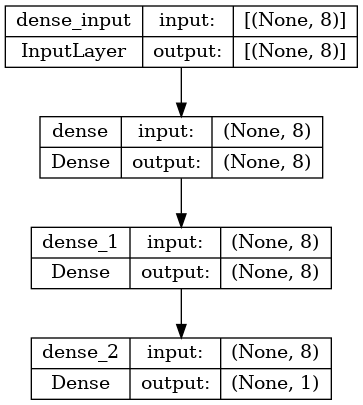

In [12]:
plot_model(model, to_file='Pertemuan_6/model_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
def eval_metrics(actual, pred):
    accuracy = accuracy_score(actual, pred)
    f1 = f1_score(actual, pred)
    recall = recall_score(actual, pred)
    precision = precision_score(actual, pred)
    return accuracy, f1, recall, precision

In [14]:
train_metrics = model.get_metrics_result()

In [15]:
experiment_dir = "Diabetes"

mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment(experiment_dir)

experiment = mlflow.get_experiment_by_name(experiment_dir)
runs = mlflow.search_runs(experiment_ids=experiment.experiment_id)
count = len(runs)

In [16]:
if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    rand_seed = 123
    np.random.seed(rand_seed)

    with mlflow.start_run(run_name=f"ann_norm_{count}", nested=True):
        # Train ANN
        #model.fit(X_train, y_train, epochs=3, batch_size=10)

        # Test ANN Model on Test Data
        y_pred_probs = model.predict(X_test)
        y_pred = (y_pred_probs > 0.5).astype(int)
        (accuracy, f1, recall, precision) = eval_metrics(y_test, y_pred)

        print(f"Accuracy: {accuracy}")
        print(f"F1 Score: {f1}")
        print(f"Recall: {recall}")
        print(f"Precision: {precision}")

        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("f1 score", f1)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("precision", precision)
        for metric_name, metric_value in train_metrics.items():
            mlflow.log_metric("train_"+metric_name, metric_value.numpy())
        
        mlflow.log_param("hidden_layers", hidden_layers)
        mlflow.log_param("neuron", neuron)
        mlflow.log_param("epochs", epochs)
        mlflow.log_param("loss_function", loss)
        mlflow.log_param("optimizer", optimizer)
        mlflow.log_param("activation", activation)
        mlflow.log_param("batch_size", batch_size)

        mlflow.log_artifact("Pertemuan_6/model_plot.png")

        predictions = model.predict(X_train)
        
        # Save the model in MLflow
        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":
            mlflow.keras.log_model(model, "model", registered_model_name=f"Diabetes_ann_{count}")
        else:
            mlflow.keras.log_model(model, "model")

5/5 [==============================] - 0s 2ms/step
Accuracy: 0.7922077922077922
F1 Score: 0.68
Recall: 0.5862068965517241
Precision: 0.8095238095238095
20/20 [==============================] - 0s 1ms/step


2023/10/17 23:17:02 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmpt0bisrwd/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpt0bisrwd/model/data/model/assets
Successfully registered model 'Diabetes_ann_10'.
2023/10/17 23:17:09 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Diabetes_ann_10, version 1
Created version '1' of model 'Diabetes_ann_10'.


Based on model performance, model ann_norm_9 is the best performing model. This model is created with relatively low resource but perform better compared to others, especially compared to ann_norm_10 which uses same parameter but with 500 epochs and taking much longer time to train. 

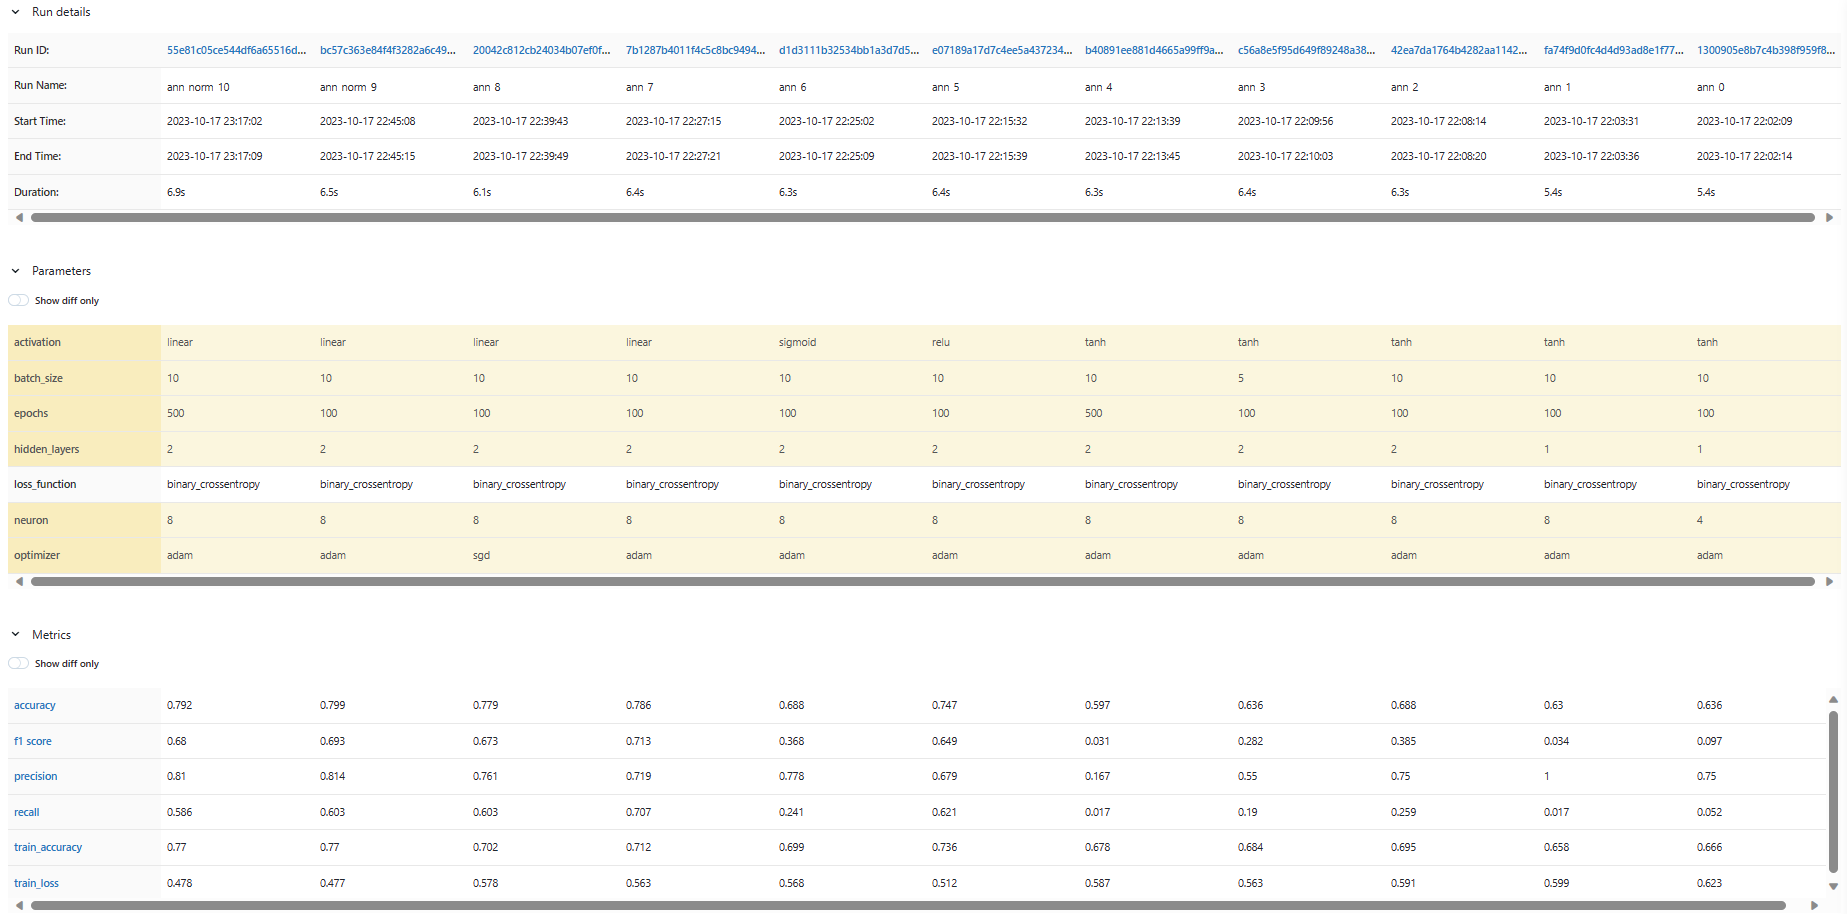

In [18]:
from IPython.display import Image
Image("Pertemuan_6/Screenshot 2023-10-17 232720.png")

In [17]:
run_id = "bc57c363e84f4f3282a6c4905b1502e8"

model = mlflow.keras.load_model("runs:/" + run_id + "/model")

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
y_pred

5/5 [==============================] - 0s 2ms/step


array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
    